In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import shap

import import_ipynb
# Auxiliar functions
from Auxiliar_functions import *

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Cargamos el Dataset

In [67]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset_Filtered.csv')

# PCA: 2 componentes

In [68]:
pca = PCA(n_components=2)
X = pca.fit_transform(df_cardiovascular.drop(columns=["target", "patientid", "noofmajorvessels"]))
y = df_cardiovascular["target"]


### Visualizacion

Text(0.5, 1.0, 'PCA 2 componentes')

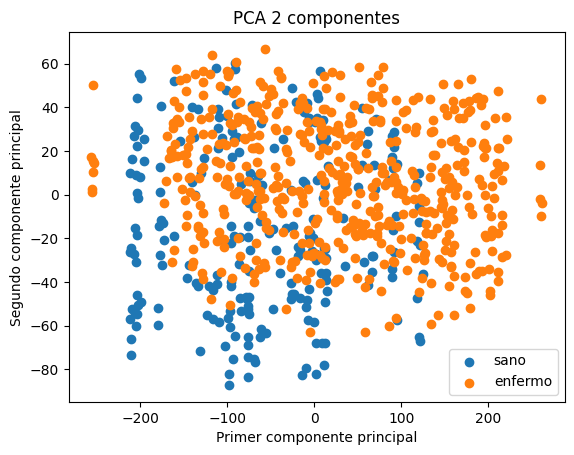

In [69]:
target = ["sano", "enfermo"]
plt.Figure(figsize=(8,6))
for i in range(2):
    plt.scatter(X[y==i,0],X[y==i,1], label=target[i])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.legend()
plt.title('PCA 2 componentes')

## Baseline Model

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
models = models_training(X_train,y_train)

Matriz de Confusion para random_forest
[[ 24  16]
 [ 11 103]]
Matriz de Confusion para logistic_regression
[[ 18  22]
 [ 13 101]]
Matriz de Confusion para Decision_tree
[[26 14]
 [21 93]]
Matriz de Confusion para Naive_Bayes
[[ 15  25]
 [ 10 104]]
Matriz de Confusion para xgboost
[[26 14]
 [18 96]]


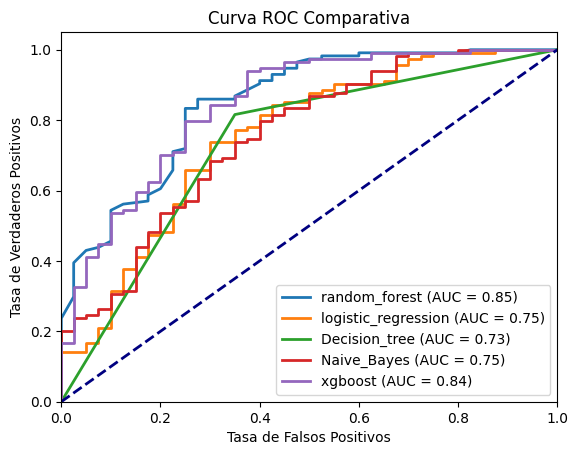


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.824675   0.865546  0.903509  0.884120  0.849452
logistic_regression  0.772727   0.821138  0.885965  0.852321  0.753509
Decision_tree        0.772727   0.869159  0.815789  0.841629  0.732895
Naive_Bayes          0.772727   0.806202  0.912281  0.855967  0.754167
xgboost              0.792208   0.872727  0.842105  0.857143  0.844298


In [72]:
modelos(X_test,y_test,models)

<string>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


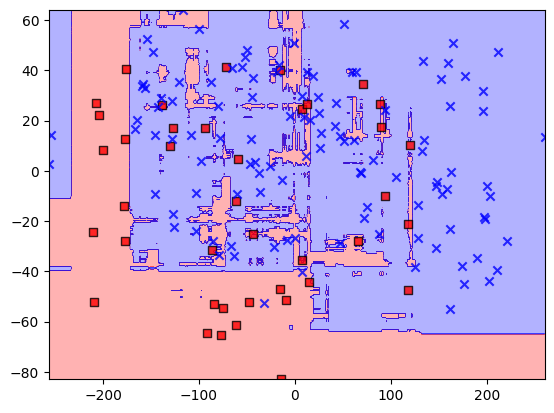

In [33]:
plot_decision_regions(X_test,y_test,models["random_forest"])

<string>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


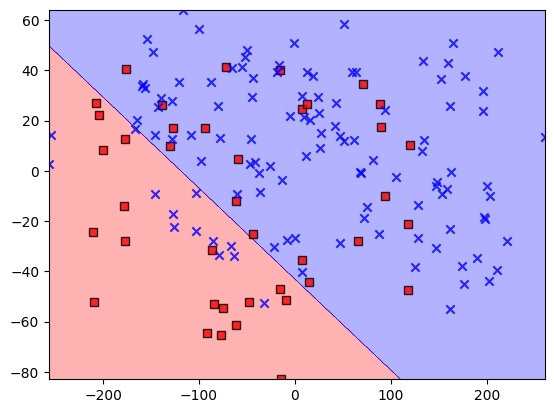

In [21]:
plot_decision_regions(X_test,y_test,models["logistic_regression"])

<string>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


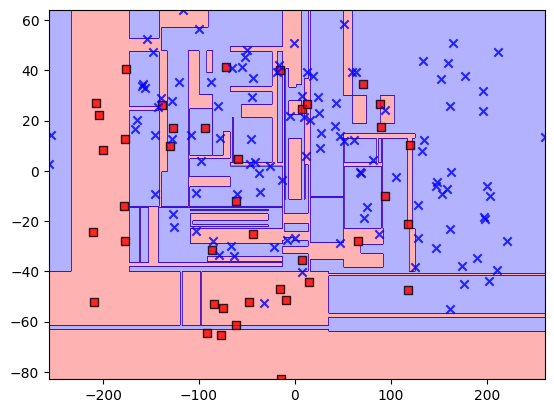

In [26]:
plot_decision_regions(X_test,y_test,models["Decision_tree"])

<string>:26: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


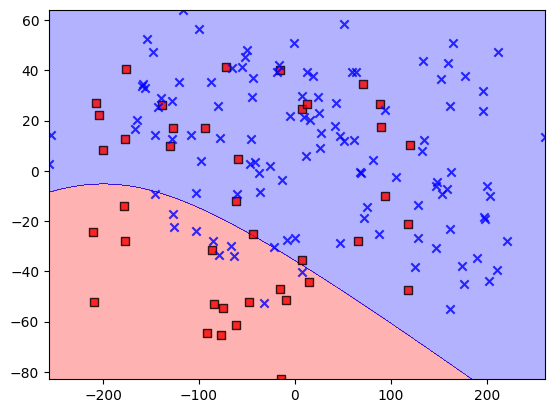

In [27]:
plot_decision_regions(X_test,y_test,models["Naive_Bayes"])

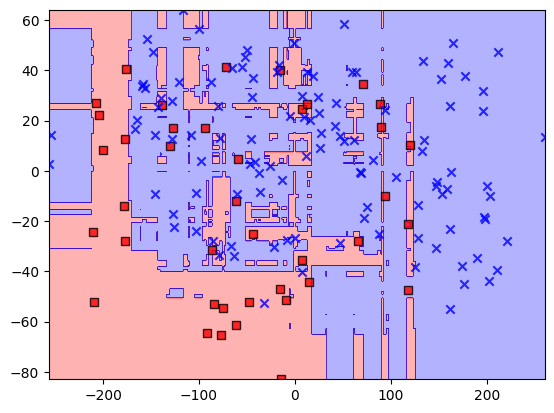

In [28]:
plot_decision_regions(X_test,y_test,models["xgboost"])

## Validacion con otro dataset

In [87]:
df_cardiovascular_2 = pd.read_csv("Cardiovascular_Disease_Dataset_2_Filtered.csv")
df_cardiovascular_2

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,target
0,40,1,1,140,289,0,0,172,0,0.0,1,0
1,49,0,2,160,180,0,0,156,0,1.0,2,1
2,37,1,1,130,283,0,1,98,0,0.0,1,0
3,48,0,3,138,214,0,0,108,1,1.5,2,1
4,54,1,2,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,1,0,110,264,0,0,132,0,1.2,2,1
742,68,1,3,144,193,1,0,141,0,3.4,2,1
743,57,1,3,130,131,0,0,115,1,1.2,2,1
744,57,0,1,130,236,0,2,174,0,0.0,2,1


In [74]:
X = pca.transform(df_cardiovascular_2.drop(columns=["target"]))
y = df_cardiovascular_2["target"]

Text(0.5, 1.0, 'PCA 2 componentes')

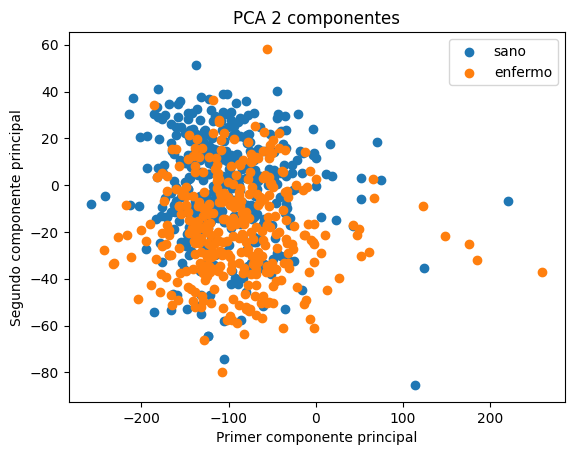

In [75]:
target = ["sano", "enfermo"]
plt.Figure(figsize=(8,6))
for i in range(2):
    plt.scatter(X[y==i,0],X[y==i,1], label=target[i])
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.legend()
plt.title('PCA 2 componentes')

Matriz de Confusion para random_forest
[[ 77 313]
 [116 240]]
Matriz de Confusion para logistic_regression
[[174 216]
 [215 141]]
Matriz de Confusion para Decision_tree
[[123 267]
 [144 212]]
Matriz de Confusion para Naive_Bayes
[[115 275]
 [188 168]]
Matriz de Confusion para xgboost
[[ 94 296]
 [127 229]]


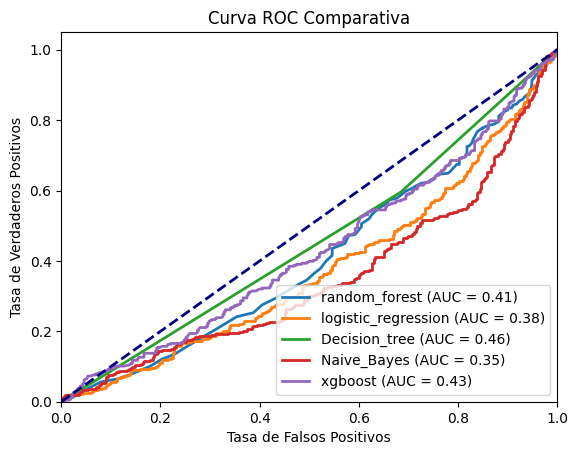


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.424933   0.433996  0.674157  0.528053  0.410102
logistic_regression  0.422252   0.394958  0.396067  0.395512  0.378184
Decision_tree        0.449062   0.442589  0.595506  0.507784  0.455445
Naive_Bayes          0.379357   0.379233  0.471910  0.420526  0.352082
xgboost              0.432976   0.436190  0.643258  0.519864  0.430881


In [76]:
modelos(X,y,models)

## Normalizacion, Balanceo y PCA

In [95]:
X = df_cardiovascular.drop(columns=["patientid","noofmajorvessels","target"])
y = df_cardiovascular["target"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('pca', PCA(n_components=2)),('oversampling', SMOTE())])

In [98]:
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [99]:
models = models_training(X_train_resampled,y_train_resampled)

Matriz de Confusion para random_forest
[[ 39   1]
 [  9 105]]
Matriz de Confusion para logistic_regression
[[32  8]
 [19 95]]
Matriz de Confusion para Decision_tree
[[ 36   4]
 [  9 105]]
Matriz de Confusion para Naive_Bayes
[[32  8]
 [20 94]]
Matriz de Confusion para xgboost
[[ 39   1]
 [  8 106]]


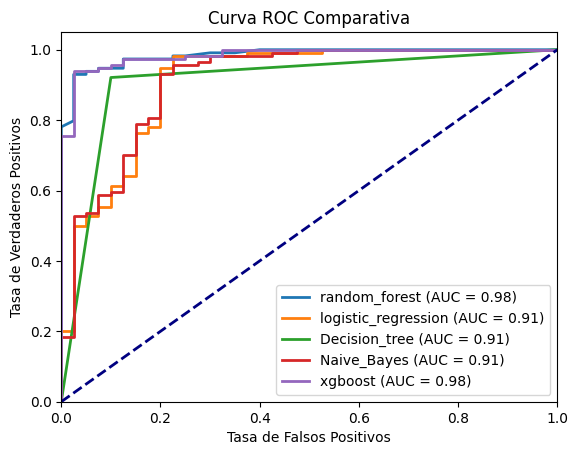


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.935065   0.990566  0.921053  0.954545  0.984430
logistic_regression  0.824675   0.922330  0.833333  0.875576  0.909211
Decision_tree        0.915584   0.963303  0.921053  0.941704  0.910526
Naive_Bayes          0.818182   0.921569  0.824561  0.870370  0.910746
xgboost              0.941558   0.990654  0.929825  0.959276  0.983772


In [100]:
scaler = pipeline.named_steps['scaler']
X_test_scaled = scaler.transform(X_test)
pca = pipeline.named_steps['pca']
X_test_pca = pca.transform(X_test_scaled)
modelos(X_test_pca,y_test,models)

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para random_forest


100%|██████████| 154/154 [00:01<00:00, 125.01it/s]


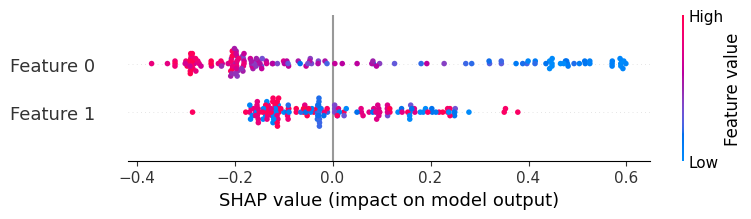

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para logistic_regression


100%|██████████| 154/154 [00:00<00:00, 584.18it/s]


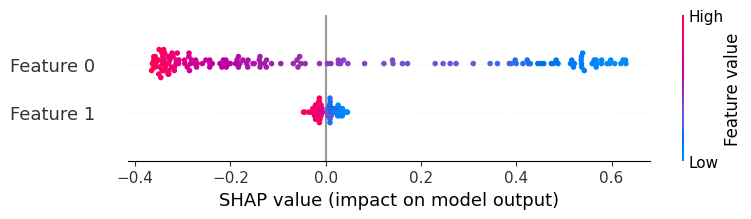

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Decision_tree


100%|██████████| 154/154 [00:00<00:00, 609.50it/s]


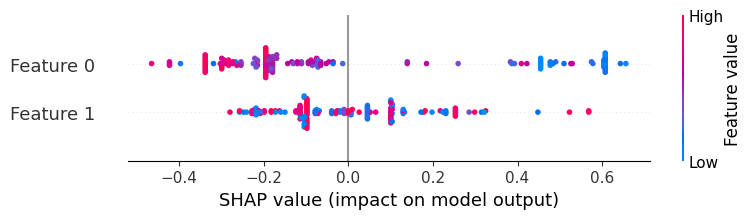

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Naive_Bayes


100%|██████████| 154/154 [00:00<00:00, 545.52it/s]


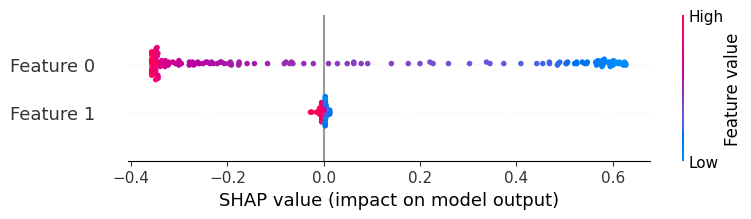

Using 154 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para xgboost


100%|██████████| 154/154 [00:00<00:00, 264.34it/s]


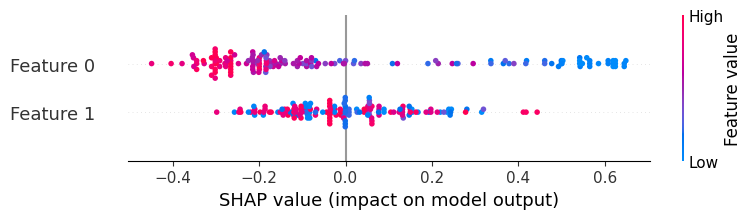

In [112]:
for name,model in models.items():
    print(f"SHAP explicación para {name}")
    explainer = shap.KernelExplainer(model=model.predict_proba, data=X_test_pca)
    shap_values = explainer.shap_values(X_test_pca)
    shap.summary_plot(shap_values[:,:,0], X_test_pca)

## Validacion con otro dataset

In [113]:
X = df_cardiovascular_2.drop(columns=['target'])
y = df_cardiovascular_2['target']

Matriz de Confusion para random_forest
[[220 170]
 [ 43 313]]
Matriz de Confusion para logistic_regression
[[293  97]
 [105 251]]
Matriz de Confusion para Decision_tree
[[186 204]
 [ 32 324]]
Matriz de Confusion para Naive_Bayes
[[297  93]
 [141 215]]
Matriz de Confusion para xgboost
[[203 187]
 [ 38 318]]


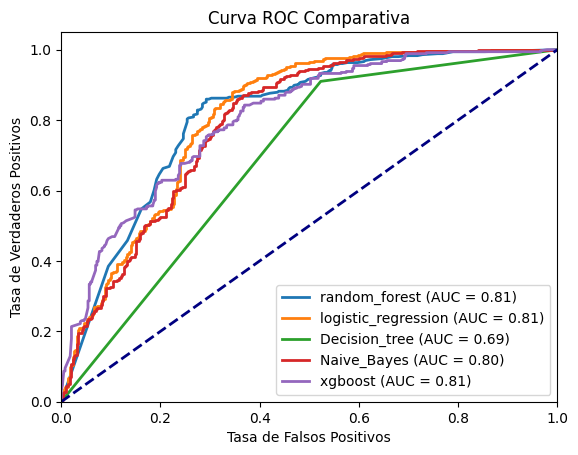


Métricas de Rendimiento para cada Modelo:
                     accuracy  precision    recall        f1    pr_auc
random_forest        0.714477   0.648033  0.879213  0.746126  0.813242
logistic_regression  0.729223   0.721264  0.705056  0.713068  0.811531
Decision_tree        0.683646   0.613636  0.910112  0.733032  0.693518
Naive_Bayes          0.686327   0.698052  0.603933  0.647590  0.795693
xgboost              0.698391   0.629703  0.893258  0.738676  0.805276


In [114]:
X_test_scaled = scaler.transform(X)
X_test_pca = pca.transform(X_test_scaled)
modelos(X_test_pca,y,models)

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para random_forest


100%|██████████| 746/746 [00:08<00:00, 84.17it/s]


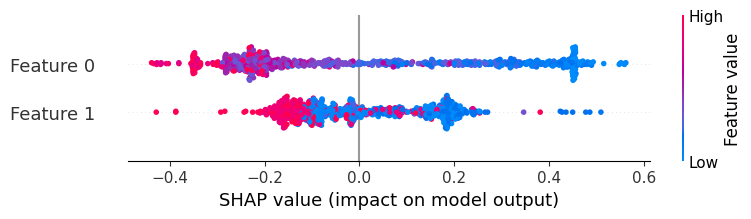

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para logistic_regression


100%|██████████| 746/746 [00:01<00:00, 613.33it/s]


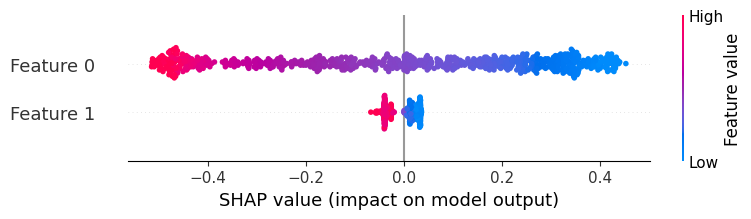

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Decision_tree


100%|██████████| 746/746 [00:01<00:00, 621.78it/s]


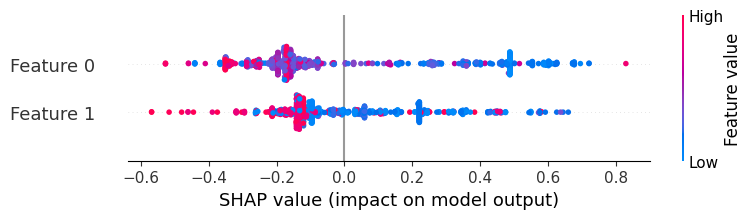

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para Naive_Bayes


100%|██████████| 746/746 [00:01<00:00, 508.25it/s]


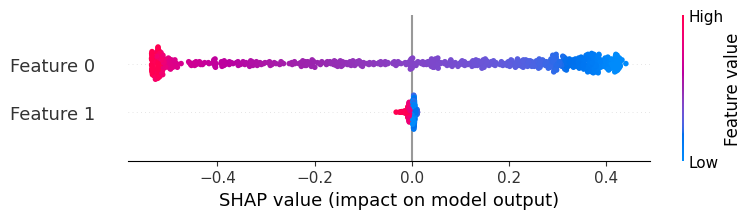

Using 746 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


SHAP explicación para xgboost


100%|██████████| 746/746 [00:02<00:00, 252.80it/s]


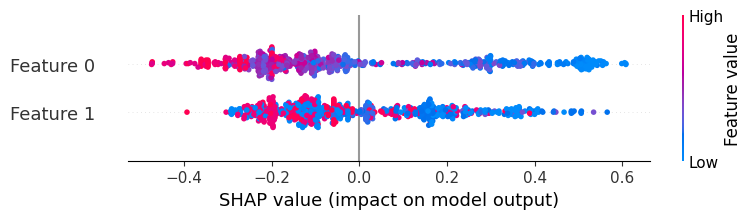

In [115]:
for name,model in models.items():
    print(f"SHAP explicación para {name}")
    explainer = shap.KernelExplainer(model=model.predict_proba, data=X_test_pca)
    shap_values = explainer.shap_values(X_test_pca)
    shap.summary_plot(shap_values[:,:,0], X_test_pca)